In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read in Data


In [13]:
df = pd.read_csv("../data/data_daily.csv")
print(f"The dataset has {df.shape[0]} records, and {df.shape[1]} features.")

The dataset has 365 records, and 2 features.


#### Feature Engineering
Let's check the datatypes of our features


In [14]:
df.dtypes

# Date           object
Receipt_Count     int64
dtype: object

We see that the Date is currently of type object, so let's copnvert it to a Datatime object which will be helpful in the upcmoing steps

In [15]:
# remove the # from the column name
df.rename(columns={'# Date': 'Date'}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)


df["day"] = df.index.day
df["month"] = df.index.month
df["year"] = df.index.year
df["weekday"] = df.index.weekday

In [17]:
df.head()

,Receipt_Count,day,month,year,weekday
Date,,,,,
2021-01-01,7564766,1,1,2021,4
2021-01-02,7455524,2,1,2021,5
2021-01-03,7095414,3,1,2021,6
2021-01-04,7666163,4,1,2021,0
2021-01-05,7771289,5,1,2021,1
...,...,...,...,...,...
2021-12-27,10350408,27,12,2021,0
2021-12-28,10219445,28,12,2021,1
2021-12-29,10313337,29,12,2021,2


#### Visualize Data
With the day, month, year, and weekday information extracted from the dataset's dates, let's visualize the variations in receipt counts based on these temporal factors.

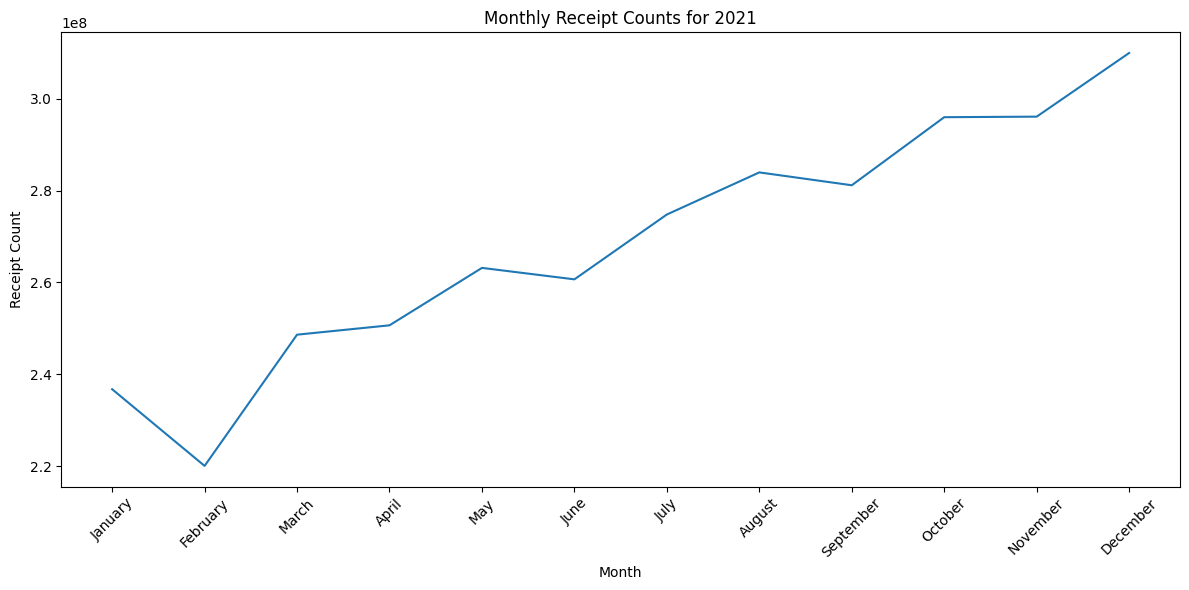

In [24]:
# Aggregating the receipt counts by month
monthly_receipts = df.groupby('month')['Receipt_Count'].sum()

# Plotting month vs. receipt count
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
plt.plot(months, monthly_receipts)
plt.title('Monthly Receipt Counts for 2021')
plt.xlabel('Month')
plt.ylabel('Receipt Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the line graph illustrating the month-to-month relationship between months and receipt counts, an upward trend emerges throughout the year, starting from January and culminating in December. While there is a noticeable dip in February, this deviation appears to be an anomaly in an otherwise consistent upward trajectory. This overarching trend suggests a growth in receipt counts as the year progresses.

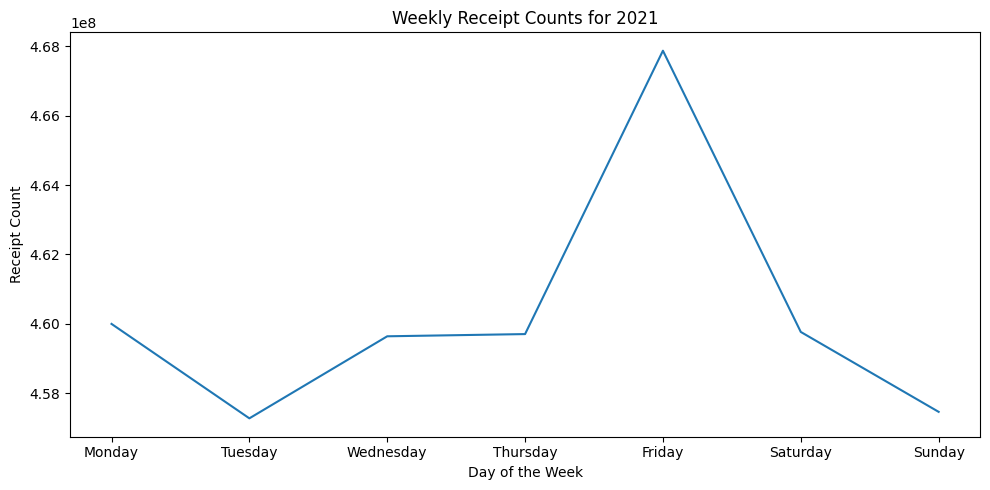

In [23]:
# Aggregating the receipt counts by day of the week
weekday_receipts = df.groupby('weekday')['Receipt_Count'].sum()

# Plotting weekday vs. receipt count
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10,5))
plt.plot(days, weekday_receipts)
plt.title('Weekly Receipt Counts for 2021')
plt.xlabel('Day of the Week')
plt.ylabel('Receipt Count')
plt.tight_layout()
plt.show()

Examining the weekly graph detailing receipt counts, it becomes evident that Fridays experience a pronounced surge in activity, marking it as the peak day for receipts. Thursdays and Saturdays also exhibit heightened counts, trailing closely behind Fridays. In contrast, Sundays and Tuesdays register the lowest receipt activity during the week. This pattern suggests distinct weekly behaviors in receipt submissions, with weekends and the lead-up to them being particularly active, save for a quieter Sunday.